<a href="https://colab.research.google.com/github/LordFagner/projetoAlura/blob/main/alurastorebr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#1. Análise do faturamento


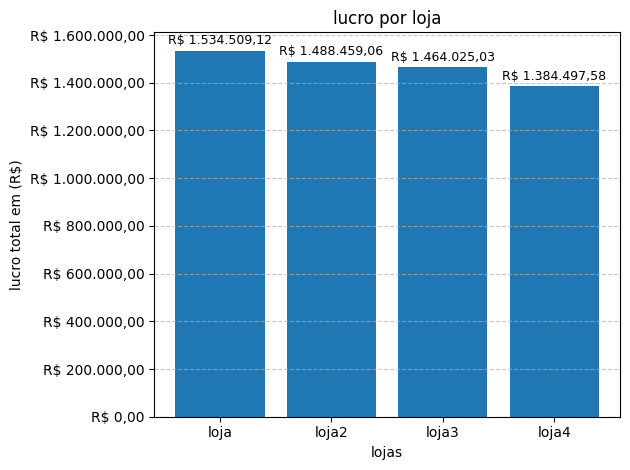

In [19]:
lojas = [loja, loja2, loja3, loja4]
lojasId = ['loja', 'loja2', 'loja3', 'loja4']
lucro = {chave: float(loja["Preço"].sum()) for chave, loja in zip(lojasId, lojas)}
# print(lucro) verficiação da validade dos dados
bars = plt.bar(x=lucro.keys(), height=lucro.values())
plt.xlabel("lojas")
plt.ylabel("lucro total em (R$)")
plt.title("lucro por loja")

plt.grid(axis='y', linestyle='--', alpha=0.7)

formatter = ticker.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,  yval + (yval * 0.01), formatter(yval, None),  ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


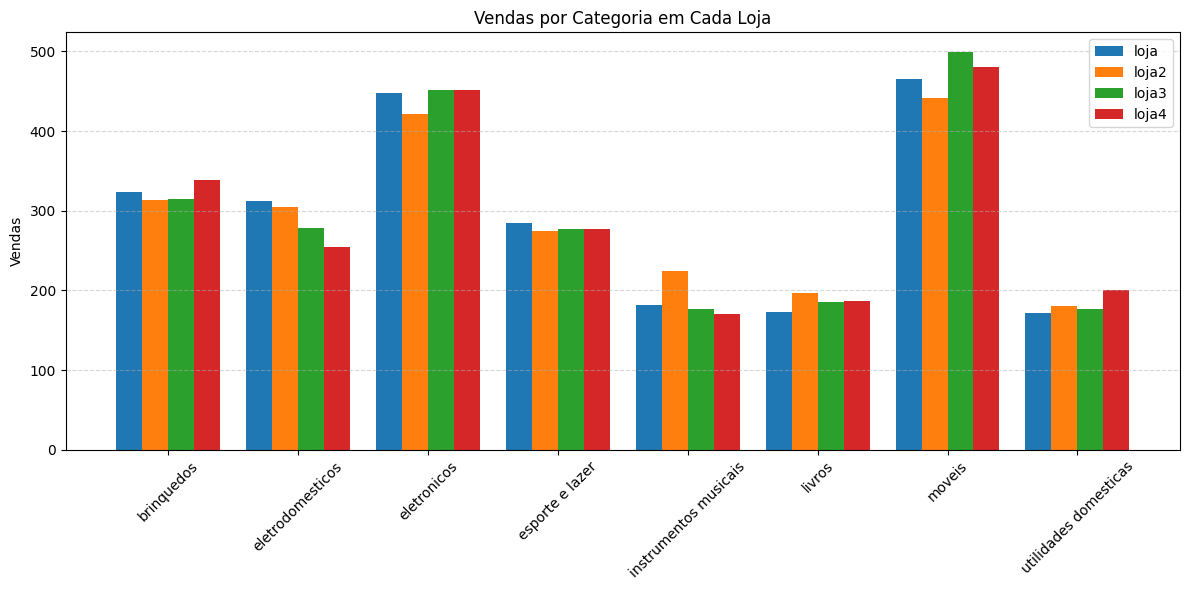

In [22]:
#criando um dict de loja = ['categorias] usada para retorna as categoiras de cada loja o acesso se dar atraves do categorias['categoria de prodto'].unique isso faz com que seja devoldio as categorias de cada loja sem repetição
categorias = {
    chave: list(categoria['Categoria do Produto'].unique())
    for chave, categoria in zip(lojasId, lojas)
}
# print(categorias)

categoriasFinais = set(cat for lista in categorias.values() for cat in lista) # o set é uma lista que não permite duplicações ao entrarmos com cat for list in categorias for cat in list .values ,
#estamos retornando para o computador o seguinte , acesse cada valor do dicionario categoria , agora percorra cada item das listas retornadas é adicone a set

# tabelaCompleta = pd.concat([loja, loja2, loja3, loja4]) caso a analise se refira a totalidade vendida as duas linhas abaixo irão fazer o filtro de vendas

# vendasPorCategoria = tabelaCompleta.groupby('Categoria do Produto')['Produto'].count().to_dict()

# caso a analise deva ser feita por loja
vendasDeProdutosPorLoja = {
    chave: valor.groupby('Categoria do Produto')['Produto'].count().to_dict()
    for chave, valor in zip(lojasId, lojas)
} #cria um novo  dict que coloca em cada loja um dicionario que relaciona as categorias com quanto foi vendido estilo loja: {brinquedos : 540 } isso é feito a partir do groupby que agrupa os elementos por categoria
# a clausula valor que recebe loja , é devolve a relação de categoria de produtos com produtos em forma de dicionario
num_categorias = len(categoriasFinais)
num_lojas = len(vendasDeProdutosPorLoja)
#extrai a quantidade de categorias e lojas para mapeamento
x = np.arange(num_categorias)
bar_width = 0.8 / num_lojas  # ajuste para encaixar todas as barras
#ajusta grossura das barras

plt.figure(figsize=(12, 6))
#cria a figura

#ordenando as categorias para manter a consistencia
categoriasOrdenadas = sorted(categoriasFinais)

#cria um enumerate na estrutura (i,(Dados))
for i, (loja, vendas) in enumerate(vendasDeProdutosPorLoja.items()):
    valores = [vendas.get(c, 0) for c in categoriasOrdenadas]
    plt.bar(x + i * bar_width, valores, width=bar_width, label=loja)
#ajusta o eixo x , ao passar para valores , o vendas.get(c,0) que é pegar as vendas da cetgoria c no campo 0 ,
#o  plt termina  de confugirar a barra
# Personalizações
plt.xticks(x + bar_width * (num_lojas - 1) / 2, categoriasOrdenadas, rotation=45) #cria o posiciionamentos do rotulos em x
plt.ylabel('Vendas')
plt.title('Vendas por Categoria em Cada Loja')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# print(vendasPorCategoria)
# print(vendasDeProdutosPorLoja)








# 3. Média de Avaliação das Lojas

  # 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
